In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pltly

In [287]:
# Importing data from the source
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_prognostic = fetch_ucirepo(id=16) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_prognostic.data.features 
y = breast_cancer_wisconsin_prognostic.data.targets 
  
# metadata 
source_metadata = breast_cancer_wisconsin_prognostic.metadata
print(source_metadata) 
  
# variable information 
list_variables = breast_cancer_wisconsin_prognostic.variables
print(list_variables) 


{'uci_id': 16, 'name': 'Breast Cancer Wisconsin (Prognostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/16/breast+cancer+wisconsin+prognostic', 'data_url': 'https://archive.ics.uci.edu/static/public/16/data.csv', 'abstract': 'Prognostic Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 198, 'num_features': 33, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Outcome'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1995, 'last_updated': 'Sun Jan 14 2024', 'dataset_doi': '10.24432/C5GK50', 'creators': ['William Wolberg', 'W. Street', 'Olvi Mangasarian'], 'intro_paper': None, 'additional_info': {'summary': 'Each record represents follow-up data for one breast cancer case.  These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive brea

In [288]:
print("X.shape", X.shape)

# Handling Null/NaN missing values
null_value_variables = np.array([]) # initialize an empty array to store the variables with null value
for col in X:
    if(X[col].isnull().sum() != 0):
        print(col,"has null value count ", X[col].isnull().sum())
        X = X.fillna(int(X[col].mean())) # fill missing value by taking int(mean) of that column
        
        null_value_variables = np.append(null_value_variables, col)   

print("list of null value columns",null_value_variables)

# After null / nan value treatment
for null_value_variable in null_value_variables:
    print(null_value_variable,"has null value count ",X[null_value_variable].isnull().sum(), "after treating missing values as mean of the data")

X.shape (198, 33)
lymph_node_status has null value count  4
list of null value columns ['lymph_node_status']
lymph_node_status has null value count  0 after treating missing values as mean of the data


In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [290]:

# transforming categorical data N and R to integers 0s and 1s
label_encoder = LabelEncoder()
# Fit label encoder and transform target variable
#print(y)
y_dash = np.ravel(y["Outcome"])
#print(y_dash)
#Label Encoding the features (N as 0,R as 1)
y_encoded = label_encoder.fit_transform(y_dash)
#print(y_encoded)
# splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [291]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names =['Logistic_Regression', 'SVM', 'Decision_Tree_Classifier', 'Random_Forest_Classifier', 'KNN']



In [292]:
# Hyperparameters tunning
# Understanding all of the hyperparameters for parameter selection for GridSearchCV()

# listing all the parameters for our selected models
for model, model_name in zip(models, model_names):
    print("\n BEFORE >> \n", model, model.get_params())

#Setting up dictionaries for the parameters for models 
param_grid_lrc = {'fit_intercept': [True, False]}
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
param_grid_dtc = {'max_depth': [n for n in range(1, 30, 1)]}  
param_grid_rfc = {}  
param_grid_knc = {'n_neighbors': [n for n in range(1, 15, 1)]}  

# list of dictionaries
param_grid_list = [param_grid_lrc, param_grid_svc, param_grid_dtc, param_grid_rfc, param_grid_knc]
# print(param_grid_list)


 BEFORE >> 
 LogisticRegression() {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

 BEFORE >> 
 SVC() {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

 BEFORE >> 
 DecisionTreeClassifier() {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

 BEFORE >> 
 RandomForestClassifier() {'bootstrap': True, 'ccp_alpha'

In [293]:
# Generating and saving models
import joblib

for model, model_name, param_grid in zip(models, model_names, param_grid_list):
    # fit the model using GridSearchCV Grid Search Cross Validation
    grid_search_model = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='f1')

    # training the model on the dataset
    grid_search_model.fit(X_train, y_train)

    #  getting to know all outcomes of the evaluation metric for each parameter combination
    #print(pd.DataFrame(grid_search_model.cv_results_))
    print(grid_search_model.best_params_)
    # saving the model using joblib
    model_file_name = model_name+".joblib"
    print("Saving Model: ", model_file_name, "\n")
    joblib.dump(grid_search_model, model_file_name)
    
    
 

{'fit_intercept': False}
Saving Model:  Logistic_Regression.joblib 

{'C': 100, 'gamma': 0.01}
Saving Model:  SVM.joblib 

{'max_depth': 29}
Saving Model:  Decision_Tree_Classifier.joblib 

{}
Saving Model:  Random_Forest_Classifier.joblib 

{'n_neighbors': 1}
Saving Model:  KNN.joblib 



In [294]:
# Loading model and running score analysis
models_scores_accuracy = []
models_scores_f1_score = []
models_scores_precision_score = []
models_scores_recall_score = []
models_scores_confusion_matrix = []

for model, model_name, param_grid in zip(models, model_names, param_grid_list):
        
    # loading the model and run for scores - score calculation
    model_file_name = model_name+".joblib"
    print("Loading Model: ", model_file_name)
    grid_search_model = joblib.load(model_file_name)

    # Making predictions using test data
    y_pred = grid_search_model.predict(X_test)
    
    print("Running test score >>>> working")
    # Calculate accuracy score for all models and storing in an array
    model_accuracy = accuracy_score(y_test, y_pred)
    models_scores_accuracy.append([model_name, model_accuracy])

    # Calculate f1 score for all models and storing in an array
    model_f1_score = f1_score(y_test, y_pred)
    models_scores_f1_score.append([model_name, model_f1_score])

    # Calculate precision score for all models and storing in an array
    model_precision_score = precision_score(y_test, y_pred)
    models_scores_precision_score.append([model_name, model_precision_score])

    # Calculate recall score for all models and storing in an array
    model_recall_score = recall_score(y_test, y_pred)
    models_scores_recall_score.append([model_name, model_recall_score])
 
    # Calculate confusion matrix for all models and storing in an array
    model_confusion_matrix = confusion_matrix(y_test, y_pred)
    models_scores_confusion_matrix.append([model_name, model_confusion_matrix])

    print("Working Successfull >>>>", model_name, "\n")


Loading Model:  Logistic_Regression.joblib
Running test score >>>> working
Working Successfull >>>> Logistic_Regression 

Loading Model:  SVM.joblib
Running test score >>>> working
Working Successfull >>>> SVM 

Loading Model:  Decision_Tree_Classifier.joblib
Running test score >>>> working
Working Successfull >>>> Decision_Tree_Classifier 

Loading Model:  Random_Forest_Classifier.joblib
Running test score >>>> working
Working Successfull >>>> Random_Forest_Classifier 

Loading Model:  KNN.joblib
Running test score >>>> working
Working Successfull >>>> KNN 



In [295]:
# Analyzing test scores
sorted_models_accuracy = sorted(models_scores_accuracy, key = lambda x: x[1], reverse=True )
print("\nsorted Model #accuracy scores:\n", sorted_models_accuracy)

sorted_models_f1_score = sorted(models_scores_f1_score, key = lambda x: x[1], reverse=True )
print("\nsorted Model #f1 scores:\n", sorted_models_f1_score)

sorted_models_precision_score = sorted(models_scores_precision_score, key = lambda x: x[1], reverse=True )
print("\nsorted Model #precision scores:\n", sorted_models_precision_score)

sorted_models_recall_score = sorted(models_scores_recall_score, key = lambda x: x[1], reverse=True )
print("\nsorted Model #recall scores:\n", sorted_models_recall_score)

for cm in models_scores_confusion_matrix:
    print("\n", cm[0], "\n",cm[1])


sorted Model #accuracy scores:
 [['Random_Forest_Classifier', 0.85], ['SVM', 0.8], ['Decision_Tree_Classifier', 0.8], ['KNN', 0.775], ['Logistic_Regression', 0.625]]

sorted Model #f1 scores:
 [['SVM', 0.5], ['Decision_Tree_Classifier', 0.5], ['Random_Forest_Classifier', 0.5], ['KNN', 0.47058823529411764], ['Logistic_Regression', 0.44444444444444436]]

sorted Model #precision scores:
 [['Random_Forest_Classifier', 0.75], ['SVM', 0.5], ['Decision_Tree_Classifier', 0.5], ['KNN', 0.4444444444444444], ['Logistic_Regression', 0.3157894736842105]]

sorted Model #recall scores:
 [['Logistic_Regression', 0.75], ['SVM', 0.5], ['Decision_Tree_Classifier', 0.5], ['KNN', 0.5], ['Random_Forest_Classifier', 0.375]]

 Logistic_Regression 
 [[19 13]
 [ 2  6]]

 SVM 
 [[28  4]
 [ 4  4]]

 Decision_Tree_Classifier 
 [[28  4]
 [ 4  4]]

 Random_Forest_Classifier 
 [[31  1]
 [ 5  3]]

 KNN 
 [[27  5]
 [ 4  4]]


In [296]:
print("training and scroding completed - successfully")

training and scroding completed - successfully


31
1

 @: 0 
Model: Logistic_Regression 
Scores:
 [[19 13]
 [ 2  6]]
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure

 @: 1 
Model: SVM 
Scores:
 [[28  4]
 [ 4  4]]
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure

 @: 2 
Model: Decision_Tree_Classifier 
Scores:
 [[28  4]
 [ 4  4]]
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure

 @: 3 
Model: Random_Forest_Classifier 
Scores:
 [[31  1]
 [ 5  3]]
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - text lable >>>
I am here >>> End of figure - t

C:\Users\Admin\AppData\Local\Temp\ipykernel_21480\3390217752.py:37: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



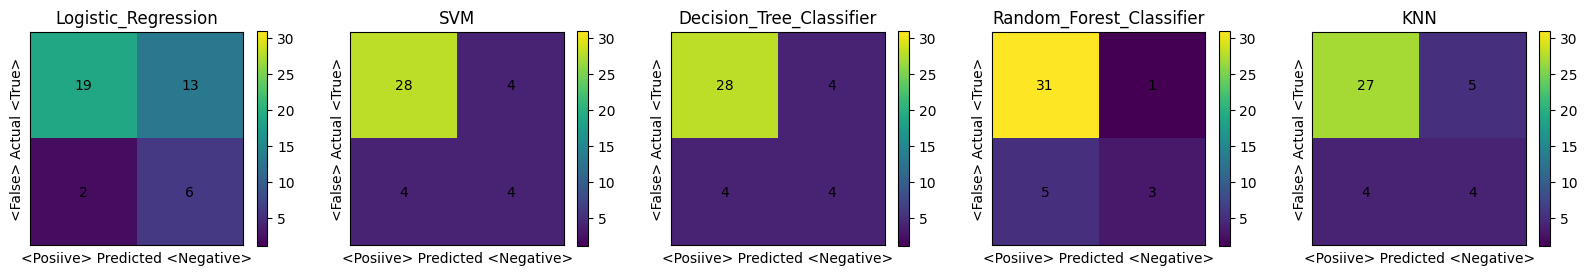

In [297]:
# confusion matrix - referebce: https://www.v7labs.com/blog/confusion-matrix-guide
list_max =[np.max(cm[1].flatten()) for cm in models_scores_confusion_matrix]
list_min =[np.min(cm[1].flatten()) for cm in models_scores_confusion_matrix]

max_val = np.max(list_max)
min_val = np.min(list_min) 
print(max_val)
print(min_val)

fig, axs = plt.subplots(1, 5, figsize=(20, 4))
counter:int = 0

for cm in models_scores_confusion_matrix:
    conf_matrix = cm[1]
    model = cm[0]
    print("\n @:",counter, "\nModel:", model, "\nScores:\n",conf_matrix)
       
    
    # Plot the first heatmap using viridis
    im=axs[counter].imshow(conf_matrix, cmap='viridis', vmin = min_val, vmax = max_val)
    axs[counter].set_title(f'{model}')
    fig.colorbar(im, ax=axs[counter], shrink=0.7)
     
    # Hide x and y ticks
    axs[counter].set_xticks([])
    axs[counter].set_yticks([])
   
    # Set x-axis and y-axis labels
    axs[counter].set_xlabel('<Posiive> Predicted <Negative>')
    axs[counter].set_ylabel('<False> Actual <True>')
    
    # Add text annotations for each cell in the confusion matrix
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            axs[counter].text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
            print(f"I am here >>> End of figure - text lable >>>")
    fig.show()
    counter = counter + 1
    print(f"I am here >>> End of figure")
    




In [298]:
models_scores_confusion_matrix

[['Logistic_Regression',
  array([[19, 13],
         [ 2,  6]], dtype=int64)],
 ['SVM',
  array([[28,  4],
         [ 4,  4]], dtype=int64)],
 ['Decision_Tree_Classifier',
  array([[28,  4],
         [ 4,  4]], dtype=int64)],
 ['Random_Forest_Classifier',
  array([[31,  1],
         [ 5,  3]], dtype=int64)],
 ['KNN',
  array([[27,  5],
         [ 4,  4]], dtype=int64)]]

['True Positive', 'False Negative', 'False Positive', 'True Negative']
31


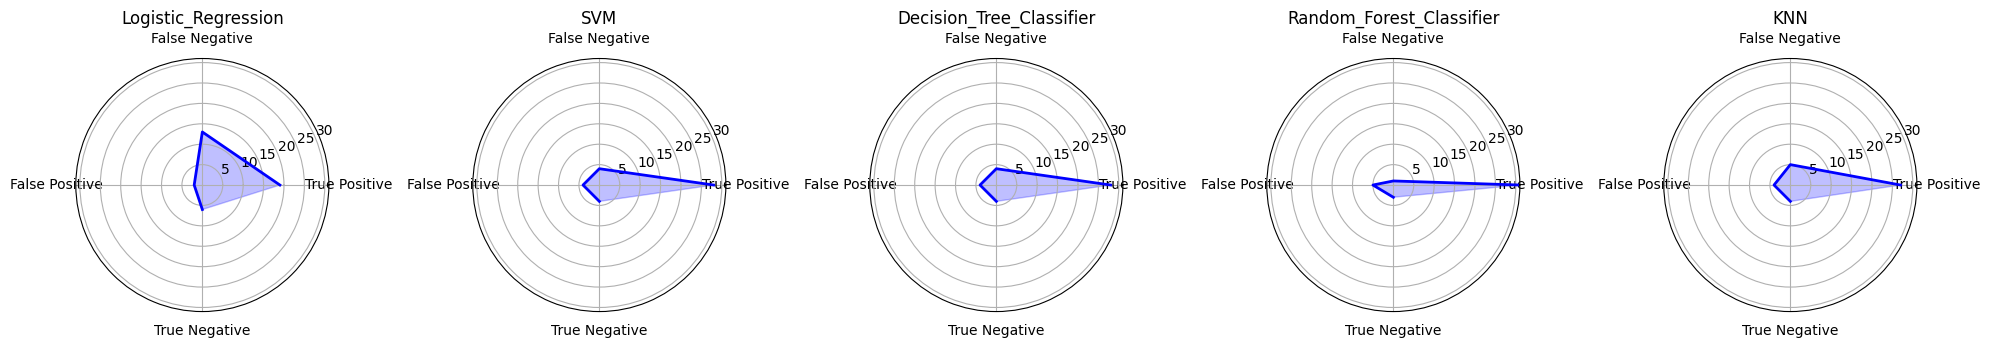

In [299]:
import matplotlib.pyplot as plt
import numpy as np

# Define labels for radar chart axes
labels = ['True Positive','False Negative','False Positive', 'True Negative']
print(labels)
# Create subplots for each radar chart
fig, axs = plt.subplots(1, 5, figsize=(20, 4), subplot_kw=dict(polar=True))
counter = 0

print(max_val)
for cm in models_scores_confusion_matrix:
    model = cm[0]
    data = cm[1].flatten()
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    
    # Plot radar chart
    axs[counter].fill(angles, data, color='blue', alpha=0.25)
    axs[counter].plot(angles, data, color='blue', linewidth=2)
    axs[counter].set_ylim(0, max_val)  # Adjust the y-axis limit if needed
    
    # Add labels
    axs[counter].set_xticks(angles)
    axs[counter].set_xticklabels(labels)
    axs[counter].set_title(model)
    
    # Increment counter
    counter += 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [300]:
import plotly.express as px
import numpy as np

# Define labels for radar chart axes
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']

# Iterate over each model's confusion matrix and plot a radar chart
for cm in models_scores_confusion_matrix:
    model = cm[0]
    data = cm[1].flatten()
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    
    # The plot is circular, so we "roll" the labels and data to start from the top
    data = np.roll(data, 1)
    labels = np.roll(labels, 1)
    
    # Create a new figure for each radar chart
    fig = px.line_polar()

    # Plot radar chart
    fig.add_scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        line=dict(color='blue', width=2),
        name=model
    )

    # Update layout for the radar chart
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 35])
        ),
        title=f'Confusion Matrix Radar Chart - {model}'
    )

    # Show the radar chart
    fig.show()


In [301]:
import plotly.graph_objects as go

categories = ['True Positive','False Negative','False Positive', 'True Negative']


fig = go.Figure()
for cm in models_scores_confusion_matrix:
    conf_matrix = cm[1]
    model = cm[0]
    fig.add_trace(go.Scatterpolar(r=conf_matrix.flatten(), theta=categories, fill='toself', name='Product A'))
    fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 31])), showlegend=False)
fig.show()